In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [73]:
df = pd.read_csv('placement_linear_regression.csv')
df.head(3)

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25


In [74]:
df.shape

(200, 2)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [76]:
df.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


In [77]:
df['cgpa'].value_counts()

cgpa
5.84    5
7.28    4
6.93    4
6.94    4
6.19    3
       ..
5.32    1
6.51    1
5.11    1
7.60    1
7.21    1
Name: count, Length: 163, dtype: int64

Text(0, 0.5, 'package')

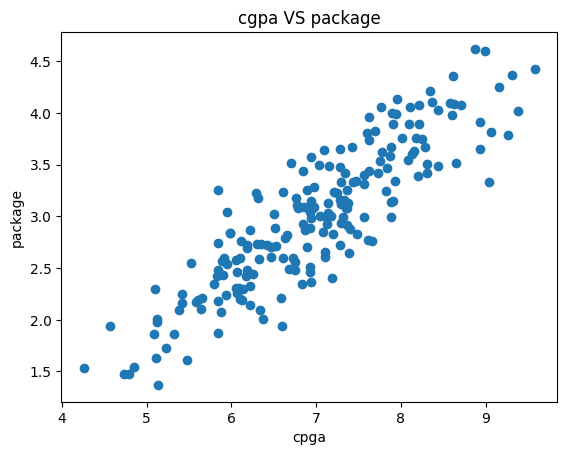

In [78]:
plt.scatter(df['cgpa'], df['package'])
plt.title('cgpa VS package')
plt.xlabel('cpga')
plt.ylabel('package')

In [79]:
x = df['cgpa']    # x = df.iloc[:,0:1]
y = df['package']  # y = df.iloc[:,-1]

In [80]:
x_train , x_test , y_train, y_test = train_test_split(x,y, test_size = 0.2 , random_state = 2)

In [81]:
x_train , x_test , y_train , y_test

(137    7.14
 163    8.93
 111    5.42
 123    5.10
 109    7.77
        ... 
 43     7.66
 22     6.14
 72     7.78
 15     7.25
 168    8.65
 Name: cgpa, Length: 160, dtype: float64,
 112    8.58
 29     7.15
 182    5.88
 199    6.22
 193    4.57
 85     4.79
 10     5.32
 54     6.86
 115    8.35
 35     6.87
 12     8.94
 92     7.90
 13     6.93
 126    5.91
 174    7.32
 2      7.82
 44     5.09
 3      7.42
 113    6.94
 14     7.73
 23     6.19
 25     7.28
 6      6.73
 134    7.20
 165    8.21
 173    6.75
 45     7.87
 65     7.60
 48     8.63
 122    5.12
 178    8.15
 64     7.36
 9      8.31
 57     6.60
 78     6.59
 71     7.47
 128    7.93
 176    6.29
 131    6.37
 53     6.47
 Name: cgpa, dtype: float64,
 137    3.13
 163    3.91
 111    2.25
 123    2.30
 109    4.06
        ... 
 43     2.76
 22     2.30
 72     3.62
 15     3.23
 168    3.52
 Name: package, Length: 160, dtype: float64,
 112    4.10
 29     3.49
 182    2.08
 199    2.33
 193    1.94
 85     1.48


In [82]:
lr = LinearRegression()

In [83]:
x_train

137    7.14
163    8.93
111    5.42
123    5.10
109    7.77
       ... 
43     7.66
22     6.14
72     7.78
15     7.25
168    8.65
Name: cgpa, Length: 160, dtype: float64

**`input columns must be in a 2D array  , train and test both`**

In [84]:
x_train = x_train.values.reshape(x_train.shape[0], 1)
x_test = x_test.values.reshape(x_test.shape[0], 1)

In [85]:
lr.fit(x_train, y_train)

LinearRegression()

In [86]:
lr.predict (x_test)

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

In [87]:
y_test

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
12     3.65
92     4.00
13     2.89
126    2.60
174    2.99
2      3.25
44     1.86
3      3.67
113    2.37
14     3.42
23     2.48
25     3.65
6      2.60
134    2.83
165    4.08
173    2.56
45     3.58
65     3.81
48     4.09
122    2.01
178    3.63
64     2.92
9      3.51
57     1.94
78     2.21
71     3.34
128    3.34
176    3.23
131    2.01
53     2.61
Name: package, dtype: float64

In [88]:
# for clear understaing i'm creating a dataframe
pd.DataFrame (
    {
        'predicted': lr.predict(x_test).round(2),
        'acctual': y_test,
        'differece': (y_test - lr.predict(x_test).round(2))
    }
)

,predicted,acctual,differece
112,3.89,4.10,0.21
29,3.09,3.49,0.40
182,2.38,2.08,-0.30
199,2.57,2.33,-0.24
193,1.65,1.94,0.29
85,1.78,1.48,-0.30
10,2.07,1.86,-0.21
54,2.93,3.09,0.16
115,3.76,4.21,0.45
35,2.94,2.87,-0.07


**Now display the best fit line **

Text(0, 0.5, 'package')

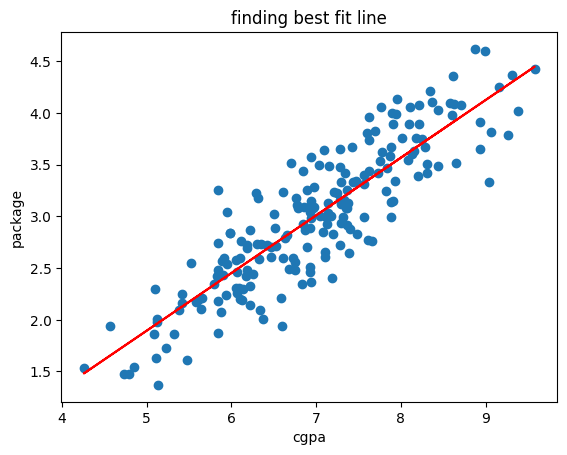

In [96]:
plt.scatter(df['cgpa'] , df['package'])
plt.plot(x_train, lr.predict(x_train), c = 'red')
plt.title ('finding best fit line')
plt.xlabel('cgpa')
plt.ylabel('package')

now finding m(slop) and b (intersept)

In [97]:
m = lr.coef_
m

array([0.55795197])

In [99]:
b = lr.intercept_
b

-0.8961119222429144

In [112]:
print('cgpa : ' , x_test[-1][0]  , '\npackage : ', y_test.tail(1).values[0])

cgpa :  6.47 
package :  2.61


In [113]:
lr.predict([[6.47]])

array([2.71383735])

In [116]:
# another way to predict throw actual maths

# y = mx + c   # package = m * cgpa + b

m*6.47 + b

array([2.71383735])